<h2>Import libraries

In [1]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import requests
import os
import urllib.request
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup, Comment
import warnings
warnings.filterwarnings('ignore')
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

<h2>Import team info containing the logos

In [2]:
logos = nfl.import_team_desc()
display(logos)

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
5,CHI,Chicago Bears,810,Bears,NFC,NFC North,#0B162A,#E64100,#0b162a,#E64100,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
6,CIN,Cincinnati Bengals,920,Bengals,AFC,AFC North,#FB4F14,#000000,#000000,#d32f1e,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
7,CLE,Cleveland Browns,1050,Browns,AFC,AFC North,#FF3C00,#311D00,#a5acaf,#d32f1e,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
8,DAL,Dallas Cowboys,1200,Cowboys,NFC,NFC East,#002244,#B0B7BC,#acc0c6,#a5acaf,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
9,DEN,Denver Broncos,1400,Broncos,AFC,AFC West,#002244,#FB4F14,#00234c,#ff5200,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/den.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflvers

<h2>Drop "LA" team abbreviation as it will cause duplicates for the Rams.

In [3]:
logos = logos.drop(logos[logos['team_abbr'] == 'LA'].index)
logos = logos.reset_index(drop=True)
display(logos)

,team_abbr,team_name,team_id,team_nick,team_conf,team_division,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,ARI,Arizona Cardinals,3800,Cardinals,NFC,NFC West,#97233F,#000000,#ffb612,#a5acaf,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,ATL,Atlanta Falcons,200,Falcons,NFC,NFC South,#A71930,#000000,#a5acaf,#a30d2d,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,BAL,Baltimore Ravens,325,Ravens,AFC,AFC North,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,BUF,Buffalo Bills,610,Bills,AFC,AFC East,#00338D,#C60C30,#0c2e82,#d50a0a,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,CAR,Carolina Panthers,750,Panthers,NFC,NFC South,#0085CA,#000000,#bfc0bf,#0085ca,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500-dark...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
5,CHI,Chicago Bears,810,Bears,NFC,NFC North,#0B162A,#E64100,#0b162a,#E64100,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/chi.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
6,CIN,Cincinnati Bengals,920,Bengals,AFC,AFC North,#FB4F14,#000000,#000000,#d32f1e,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/cin.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
7,CLE,Cleveland Browns,1050,Browns,AFC,AFC North,#FF3C00,#311D00,#a5acaf,#d32f1e,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/cle.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
8,DAL,Dallas Cowboys,1200,Cowboys,NFC,NFC East,#002244,#B0B7BC,#acc0c6,#a5acaf,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/dal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
9,DEN,Denver Broncos,1400,Broncos,AFC,AFC West,#002244,#FB4F14,#00234c,#ff5200,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/den.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflvers

<h2>Create subset for "logos" dataframe

In [4]:
logos = logos[['team_name', 'team_abbr', 'team_logo_espn']]
display(logos.head())

,team_name,team_abbr,team_logo_espn
0,Arizona Cardinals,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,Atlanta Falcons,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,Baltimore Ravens,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,Buffalo Bills,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,Carolina Panthers,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


<h2>Initialize lists and create folder for logos

In [5]:
#Initialize empty list for logo path
logo_paths = []

#Initialize empty list for the team names and abbreviations
team_name = []
team_abbr = []

#Create folder for logo files if not already exists
if not os.path.exists("logo"):
    os.makedirs("logo")

<h2>Pull team logos from URL, save them in logo folder, and save file paths.

In [6]:
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logo/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logo/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
    team_name.append(logos['team_name'][team])

<h2>Create dictionary for team name, team abbr, and logo path; then create dataframe from dictionary

In [7]:
#Create dictionary for team name, team abbr, and log path
team_info = {'Team': team_name, 'Team Abbr' : team_abbr, 'Logo Path' : logo_paths}
#Create dataframe from dictionary
logo_df = pd.DataFrame(team_info)
logo_df.head()

,Team,Team Abbr,Logo Path
0,Arizona Cardinals,ARI,logo/ARI.tif
1,Atlanta Falcons,ATL,logo/ATL.tif
2,Baltimore Ravens,BAL,logo/BAL.tif
3,Buffalo Bills,BUF,logo/BUF.tif
4,Carolina Panthers,CAR,logo/CAR.tif


In [8]:
response = requests.get('https://www.pro-football-reference.com/years/2023/')

soup = BeautifulSoup(response.text, 'html.parser')
comments = soup.find_all(string=lambda text: isinstance(text, Comment))

tables = []
for each in comments:
    if 'table' in each:
        try:
            tables.append(pd.read_html(each)[0])            
        except:
            continue

offense = pd.DataFrame(tables[2])
display(offense)

Unnamed: 0_level_0     Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk                     Tm                  G   
0                 1.0         Dallas Cowboys               17.0   
1                 2.0         Miami Dolphins               17.0   
2                 3.0    San Francisco 49ers               17.0   
3                 4.0       Baltimore Ravens               17.0   
4                 5.0          Detroit Lions               17.0   
5                 6.0          Buffalo Bills               17.0   
6                 7.0    Philadelphia Eagles               17.0   
7                 8.0       Los Angeles Rams               17.0   
8                 9.0     New Orleans Saints               17.0   
9                10.0     Indianapolis Colts               17.0   
10               11.0       Cleveland Browns               17.0   
11               12.0      Green Bay Packers               17.0   
12               13.0         Houston Texans               17.0   
13               14.0   Jacksonville Jaguars               17.0   
14               15.0     Kansas City Chiefs               17.0   
15               16.0     Cincinnati Bengals               17.0   
16               17.0       Seattle Seahawks               17.0   
17               18.0          Chicago Bears               17.0   
18               19.0         Denver Broncos               17.0   
19               20.0   Tampa Bay Buccaneers               17.0   
20               21.0   Los Angeles Chargers               17.0   
21               22.0      Minnesota Vikings               17.0   
22               23.0      Las Vegas Raiders               17.0   
23               24.0      Arizona Cardinals               17.0   
24               25.0  Washington Commanders               17.0   
25               26.0        Atlanta Falcons               17.0   
26               27.0       Tennessee Titans               17.0   
27               28.0    Pittsburgh Steelers               17.0   
28               29.0          New York Jets               17.0   
29               30.0        New York Giants               17.0   
30               31.0   New England Patriots               17.0   
31               32.0      Carolina Panthers               17.0   
32                NaN               Avg Team                NaN   
33                NaN           League Total                NaN   
34                NaN               Avg Tm/G                NaN   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Tot Yds & TO              \
                   PF                Yds          Ply  Y/P     TO   
0               509.0             6317.0       1122.0  5.6   16.0   
1               496.0             6822.0       1053.0  6.5   25.0   
2               491.0             6773.0       1024.0  6.6   18.0   
3               483.0             6296.0       1076.0  5.9   19.0   
4               461.0             6712.0       1137.0  5.9   23.0   
5               451.0             6366.0       1115.0  5.7   28.0   
6               433.0             6024.0       1112.0  5.4   28.0   
7               404.0             6108.0       1094.0  5.6   18.0   
8               402.0             5732.0       1121.0  5.1   18.0   
9               396.0             5725.0       1094.0  5.2   22.0   
10              396.0             5710.0       1187.0  4.8   37.0   
11              383.0             5873.0       1052.0  5.6   18.0   
12              377.0             5820.0       1083.0  5.4   14.0   
13              377.0             5772.0       1114.0  5.2   30.0   
14              371.0             5972.0       1080.0  5.5   28.0   
15              366.0             5422.0       1048.0  5.2   16.0   
16              364.0             5490.0        995.0  5.5   17.0   
17              360.0             5495.0       1097.0  5.0   25.0   
18              357.0             5072.0       1016.0  5.0   22.0   
19              348.0             5321.0       1047.0  5.1   18.0   
20   

<h2>Drop 1st level of multi-level index

In [9]:
offense.columns = offense.columns.droplevel(0)
display(offense)

,Rk,Tm,G,PF,Yds,Ply,Y/P,TO,FL,1stD,...,Yds,TD,Y/A,1stD,Pen,Yds,1stPy,Sc%,TO%,EXP
0,1.0,Dallas Cowboys,17.0,509.0,6317.0,1122.0,5.6,16.0,6.0,385.0,...,1920.0,14.0,4.1,113.0,115.0,964.0,43.0,50.3,8.9,181.25
1,2.0,Miami Dolphins,17.0,496.0,6822.0,1053.0,6.5,25.0,10.0,360.0,...,2308.0,27.0,5.1,113.0,97.0,767.0,24.0,43.5,13.4,139.45
2,3.0,San Francisco 49ers,17.0,491.0,6773.0,1024.0,6.6,18.0,6.0,383.0,...,2389.0,27.0,4.8,147.0,101.0,933.0,29.0,45.3,10.1,231.48
3,4.0,Baltimore Ravens,17.0,483.0,6296.0,1076.0,5.9,19.0,12.0,360.0,...,2661.0,26.0,4.9,145.0,102.0,955.0,35.0,43.1,9.6,130.64
4,5.0,Detroit Lions,17.0,461.0,6712.0,1137.0,5.9,23.0,11.0,375.0,...,2311.0,27.0,4.6,124.0,97.0,843.0,23.0,40.6,11.8,145.19
5,6.0,Buffalo Bills,17.0,451.0,6366.0,1115.0,5.7,28.0,10.0,381.0,...,2212.0,22.0,4.3,158.0,106.0,883.0,24.0,41.4,14.9,166.97
6,7.0,Philadelphia Eagles,17.0,433.0,6024.0,1112.0,5.4,28.0,12.0,377.0,...,2190.0,22.0,4.3,149.0,95.0,785.0,31.0,42.9,15.3,109.97
7,8.0,Los Angeles Rams,17.0,404.0,6108.0,1094.0,5.6,18.0,5.0,351.0,...,2045.0,18.0,4.3,110.0,89.0,720.0,35.0,41.1,9.2,113.39
8,9.0,New Orleans Saints,17.0,402.0,5732.0,1121.0,5.1,18.0,7.0,337.0,...,1742.0,13.0,3.6,112.0,96.0,846.0,26.0,36.6,8.2,46.88
9,10.0,Indianapolis Colts,17.0,396.0,5725.0,1094.0,5.2,22.0,12.0,324.0,...,2059.0,19.0,4.3,113.0,95.0,685.0,33.0,35.7,9.2,30.12


<h2>Subset "offense" dataframe

In [10]:
offense = offense[["Tm", "G", "PF", "Yds"]]
display(offense)

,Tm,G,PF,Yds,Yds,Yds,Yds
0,Dallas Cowboys,17.0,509.0,6317.0,4397.0,1920.0,964.0
1,Miami Dolphins,17.0,496.0,6822.0,4514.0,2308.0,767.0
2,San Francisco 49ers,17.0,491.0,6773.0,4384.0,2389.0,933.0
3,Baltimore Ravens,17.0,483.0,6296.0,3635.0,2661.0,955.0
4,Detroit Lions,17.0,461.0,6712.0,4401.0,2311.0,843.0
5,Buffalo Bills,17.0,451.0,6366.0,4154.0,2212.0,883.0
6,Philadelphia Eagles,17.0,433.0,6024.0,3834.0,2190.0,785.0
7,Los Angeles Rams,17.0,404.0,6108.0,4063.0,2045.0,720.0
8,New Orleans Saints,17.0,402.0,5732.0,3990.0,1742.0,846.0
9,Indianapolis Colts,17.0,396.0,5725.0,3666.0,2059.0,685.0


<h2>Rename columns to account for duplicate "Yds" columns.

In [11]:
offense.columns = ["Team", "Games", "Pts_Scored", "Total_Yds", "Pass_Yds", "Rush_Yds", "Penalty_Yds"]
display(offense)

,Team,Games,Pts_Scored,Total_Yds,Pass_Yds,Rush_Yds,Penalty_Yds
0,Dallas Cowboys,17.0,509.0,6317.0,4397.0,1920.0,964.0
1,Miami Dolphins,17.0,496.0,6822.0,4514.0,2308.0,767.0
2,San Francisco 49ers,17.0,491.0,6773.0,4384.0,2389.0,933.0
3,Baltimore Ravens,17.0,483.0,6296.0,3635.0,2661.0,955.0
4,Detroit Lions,17.0,461.0,6712.0,4401.0,2311.0,843.0
5,Buffalo Bills,17.0,451.0,6366.0,4154.0,2212.0,883.0
6,Philadelphia Eagles,17.0,433.0,6024.0,3834.0,2190.0,785.0
7,Los Angeles Rams,17.0,404.0,6108.0,4063.0,2045.0,720.0
8,New Orleans Saints,17.0,402.0,5732.0,3990.0,1742.0,846.0
9,Indianapolis Colts,17.0,396.0,5725.0,3666.0,2059.0,685.0


<h2>Drop columns that I don't need.

In [12]:
offense = offense.drop(['Pass_Yds', 'Rush_Yds', 'Penalty_Yds'], axis=1)
display(offense)

,Team,Games,Pts_Scored,Total_Yds
0,Dallas Cowboys,17.0,509.0,6317.0
1,Miami Dolphins,17.0,496.0,6822.0
2,San Francisco 49ers,17.0,491.0,6773.0
3,Baltimore Ravens,17.0,483.0,6296.0
4,Detroit Lions,17.0,461.0,6712.0
5,Buffalo Bills,17.0,451.0,6366.0
6,Philadelphia Eagles,17.0,433.0,6024.0
7,Los Angeles Rams,17.0,404.0,6108.0
8,New Orleans Saints,17.0,402.0,5732.0
9,Indianapolis Colts,17.0,396.0,5725.0


<h2>Create "Pts/G" & "Yds/G" columns.

In [13]:
offense["Pts/G"] = round(offense["Pts_Scored"] / offense["Games"], 1)
offense["Yds/G"] = round(offense["Total_Yds"] / offense["Games"], 1)
display(offense)

,Team,Games,Pts_Scored,Total_Yds,Pts/G,Yds/G
0,Dallas Cowboys,17.0,509.0,6317.0,29.9,371.6
1,Miami Dolphins,17.0,496.0,6822.0,29.2,401.3
2,San Francisco 49ers,17.0,491.0,6773.0,28.9,398.4
3,Baltimore Ravens,17.0,483.0,6296.0,28.4,370.4
4,Detroit Lions,17.0,461.0,6712.0,27.1,394.8
5,Buffalo Bills,17.0,451.0,6366.0,26.5,374.5
6,Philadelphia Eagles,17.0,433.0,6024.0,25.5,354.4
7,Los Angeles Rams,17.0,404.0,6108.0,23.8,359.3
8,New Orleans Saints,17.0,402.0,5732.0,23.6,337.2
9,Indianapolis Colts,17.0,396.0,5725.0,23.3,336.8


<h2>Drop the NA rows.

In [14]:
offense = offense.dropna()
display(offense)

,Team,Games,Pts_Scored,Total_Yds,Pts/G,Yds/G
0,Dallas Cowboys,17.0,509.0,6317.0,29.9,371.6
1,Miami Dolphins,17.0,496.0,6822.0,29.2,401.3
2,San Francisco 49ers,17.0,491.0,6773.0,28.9,398.4
3,Baltimore Ravens,17.0,483.0,6296.0,28.4,370.4
4,Detroit Lions,17.0,461.0,6712.0,27.1,394.8
5,Buffalo Bills,17.0,451.0,6366.0,26.5,374.5
6,Philadelphia Eagles,17.0,433.0,6024.0,25.5,354.4
7,Los Angeles Rams,17.0,404.0,6108.0,23.8,359.3
8,New Orleans Saints,17.0,402.0,5732.0,23.6,337.2
9,Indianapolis Colts,17.0,396.0,5725.0,23.3,336.8


<h2>Merge "offense" and "logo_df" dataframes

In [15]:
offense_df = pd.merge(offense, logo_df)
display(offense_df)

,Team,Games,Pts_Scored,Total_Yds,Pts/G,Yds/G,Team Abbr,Logo Path
0,Dallas Cowboys,17.0,509.0,6317.0,29.9,371.6,DAL,logo/DAL.tif
1,Miami Dolphins,17.0,496.0,6822.0,29.2,401.3,MIA,logo/MIA.tif
2,San Francisco 49ers,17.0,491.0,6773.0,28.9,398.4,SF,logo/SF.tif
3,Baltimore Ravens,17.0,483.0,6296.0,28.4,370.4,BAL,logo/BAL.tif
4,Detroit Lions,17.0,461.0,6712.0,27.1,394.8,DET,logo/DET.tif
5,Buffalo Bills,17.0,451.0,6366.0,26.5,374.5,BUF,logo/BUF.tif
6,Philadelphia Eagles,17.0,433.0,6024.0,25.5,354.4,PHI,logo/PHI.tif
7,Los Angeles Rams,17.0,404.0,6108.0,23.8,359.3,LAR,logo/LAR.tif
8,New Orleans Saints,17.0,402.0,5732.0,23.6,337.2,NO,logo/NO.tif
9,Indianapolis Colts,17.0,396.0,5725.0,23.3,336.8,IND,logo/IND.tif


<h2>Subset final dataframe.

In [16]:
offense_final_df = offense_df[["Team Abbr", "Yds/G", "Pts/G", "Logo Path"]]
display(offense_final_df.head())

,Team Abbr,Yds/G,Pts/G,Logo Path
0,DAL,371.6,29.9,logo/DAL.tif
1,MIA,401.3,29.2,logo/MIA.tif
2,SF,398.4,28.9,logo/SF.tif
3,BAL,370.4,28.4,logo/BAL.tif
4,DET,394.8,27.1,logo/DET.tif


<h2>Create function for retrieving image path and loading it into visual

In [17]:
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

<h2>Get min and max for the two stats that will be used in the visual to set the appropriate range of the axes

In [18]:
print("Minimum Pts/G: ", np.min(offense_final_df["Pts/G"]))
print("Maximum Pts/G: ", np.max(offense_final_df["Pts/G"]))
print("Minimum Yds/G: ", np.min(offense_final_df["Yds/G"]))
print("Maximum Yds/G: ", np.max(offense_final_df["Yds/G"]))

Minimum Pts/G:  13.9
Maximum Pts/G:  29.9
Minimum Yds/G:  265.3
Maximum Yds/G:  401.3


<h2>Create plot

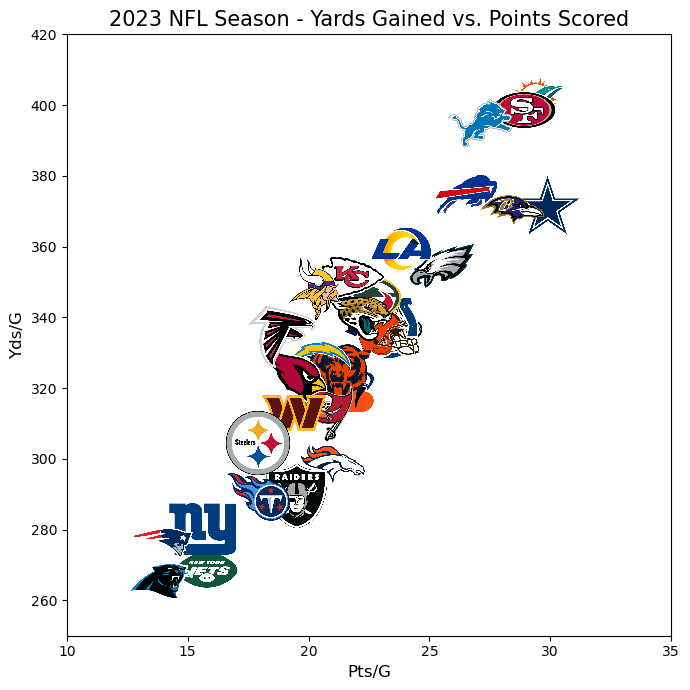

In [19]:
#Define plot size and autolayout setting
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

#Define x and y variables
x = offense_final_df["Pts/G"]
y = offense_final_df["Yds/G"]

#Define image paths
paths = offense_final_df['Logo Path']

#Define plot
fig, ax = plt.subplots()

#Load data into plot
for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#Set plot parameters
plt.xlim(10, 35);
plt.ylim(250, 420);
plt.title("2023 NFL Season - Yards Gained vs. Points Scored", fontdict={'fontsize':15});
plt.xlabel("Pts/G", fontdict={'fontsize':12});
plt.ylabel("Yds/G", fontdict={'fontsize':12});

In [20]:
offense_final_df["Pts/G_RANK"] = offense_final_df["Pts/G"].rank(method='first', ascending=False).astype(int)
offense_final_df["Yds/G_RANK"] = offense_final_df["Yds/G"].rank(method='first', ascending=False).astype(int)
offense_final_df["Pts_Yds_RANK_DIF"] = abs(offense_final_df["Yds/G_RANK"] - offense_final_df["Pts/G_RANK"])
display(offense_final_df.sort_values("Pts_Yds_RANK_DIF", ascending=False))

,Team Abbr,Yds/G,Pts/G,Logo Path,Pts/G_RANK,Yds/G_RANK,Pts_Yds_RANK_DIF
21,MIN,347.8,20.2,logo/MIN.tif,22,10,12
25,ATL,334.3,18.9,logo/ATL.tif,26,17,9
18,DEN,298.4,21.0,logo/DEN.tif,19,26,7
14,KC,351.3,21.8,logo/KC.tif,15,9,6
15,CIN,318.9,21.5,logo/CIN.tif,16,22,6
23,ARI,324.1,19.4,logo/ARI.tif,24,19,5
8,NO,337.2,23.6,logo/NO.tif,9,14,5
9,IND,336.8,23.3,logo/IND.tif,10,15,5
10,CLE,335.9,23.3,logo/CLE.tif,11,16,5
0,DAL,371.6,29.9,logo/DAL.tif,1,5,4
